# Manipulating Stock Price Data

Asset market prices are a fascinating theme. Many researchers have failed in trying to predict their dynamics, and many gurus claim to have became rich by predicting and anticipating price movements - if someone actually manages to do that, they will start buying assets when they have a low price and sell them in peak prices, and will quickly become very rich. However, as we will see, this is not as simple as it might seem.

In this notebook, we will use trading strategies as a theme, and will study Python's essential data control structures (for, if, elif, else).

## Downloading and visualizing data from yfinance

Let's get started. We will first download some data using Yahoo Finance (you could use some other source here and get essentially the same results). The `yfinance` library downloads data and returns a DataFrame. A DataFrame is a data structure from the `pandas` library that is essentially a table with labeled columns and possibly a labeled index:

In [29]:
import yfinance as yf

TICKER = 'AAPL'  # Let's get Apple stock prices to start!

# Lets get daily prices for 2024!
df = yf.download(
    tickers = TICKER,
    start='2024-01-01',
    end='2024-12-31',
    interval='1d',
    multi_level_index=False,
)

df.head() # Prints the first few lines of df

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,184.734970,187.521323,182.993502,186.237603,82488700
2024-01-03,183.351761,184.973819,182.535751,183.321908,58414500
2024-01-04,181.023163,182.197403,179.998185,181.261983,71983600
2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500


Good.

Now we have a table that shows Apple's stock prices for each day in 2024. Note that we have the daily high, low, opening and closing price, as well as the trade volume. The trade volume is in number of traded shares per day.

### Acessing dataframe line by label

We can access the prices for a specific day using the `df.loc` method of a dataframe:

In [30]:
df.loc['2024-01-02']

Close     1.847350e+02
High      1.875213e+02
Low       1.829935e+02
Open      1.862376e+02
Volume    8.248870e+07
Name: 2024-01-02 00:00:00, dtype: float64

### Acessing dataframe line by index

Also, we can access the "n-th" entry in the table using `df.iloc`:

In [31]:
df.iloc[0]

Close     1.847350e+02
High      1.875213e+02
Low       1.829935e+02
Open      1.862376e+02
Volume    8.248870e+07
Name: 2024-01-02 00:00:00, dtype: float64

### Selecting a dataframe column

To select a specific row, we can use the `df['row_name']` syntax:

In [32]:
df['Close']

Date
2024-01-02    184.734970
2024-01-03    183.351761
2024-01-04    181.023163
2024-01-05    180.296707
2024-01-08    184.655365
                 ...    
2024-12-23    255.270004
2024-12-24    258.200012
2024-12-26    259.019989
2024-12-27    255.589996
2024-12-30    252.199997
Name: Close, Length: 251, dtype: float64

### Combining everything

Of course, we can combine everything and select, for example, the closing price of `APPL` in November 2nd, 2024:

In [33]:
df.loc['2024-11-04']['Close']

np.float64(221.76600646972656)

### Getting data in a range

We might be interested in a particular subset of our data. In the case of time series, this is likely a particular range of possible days. So, we could write a filter to select our data. For such, we will use boolean operations. For example, we could try to find all data for November 2024:

In [34]:
time_filter = (df.index >= '2024-11-01') & (df.index <= '2024-11-30')
df.loc[time_filter]['Close']

Date
2024-11-01    222.665024
2024-11-04    221.766006
2024-11-05    223.204422
2024-11-06    222.475235
2024-11-07    227.229996
2024-11-08    226.960007
2024-11-11    224.229996
2024-11-12    224.229996
2024-11-13    225.119995
2024-11-14    228.220001
2024-11-15    225.000000
2024-11-18    228.020004
2024-11-19    228.279999
2024-11-20    229.000000
2024-11-21    228.520004
2024-11-22    229.869995
2024-11-25    232.869995
2024-11-26    235.059998
2024-11-27    234.929993
2024-11-29    237.330002
Name: Close, dtype: float64

### Plotting data

We can use `matplotlib` to make a basic plot of our data. For such, we first select a range, a column, and then save that to a variable. Then, we use Matplotlib's functions to make a figure:

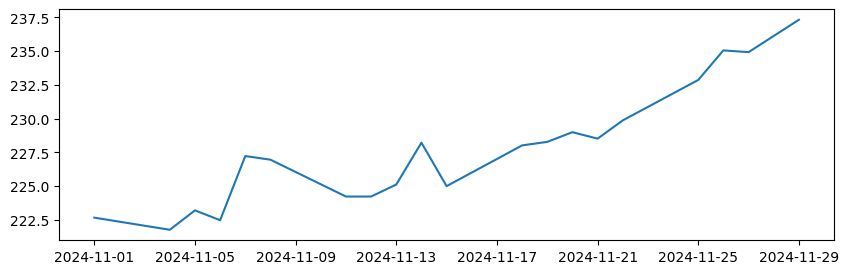

In [35]:
import matplotlib.pyplot as plt

time_filter = (df.index >= '2024-11-01') & (df.index <= '2024-11-30')
data_to_plot = df.loc[time_filter]['Close']

plt.figure( figsize=(10,3) )
plt.plot(data_to_plot)
plt.show()

## Exercise with data manipulation

1. Get monthly APPLE stock prices from 2020 to 2024.
1. Plot this data so that you can visualize closing prices within this period
1. If I go back in time and buy 1 million Dollars worth of apple stocks in early 2020, how much would these stocks be worth by the end of 2024?

In [36]:
# Code your solution here

[*********************100%***********************]  1 of 1 completed

Ticker
AAPL    3.338216
dtype: float64


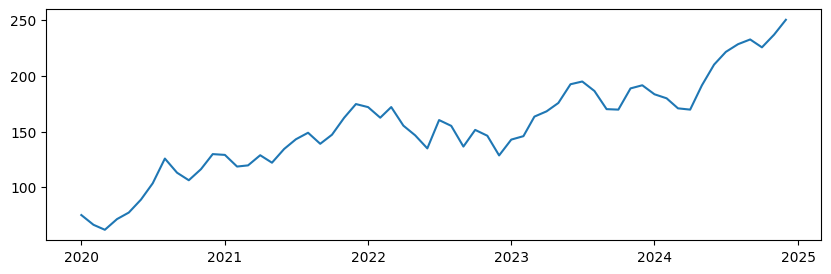

In [37]:

# This is my solution. It's not the only way to do it!
# Do NOT look at my solution before trying yours!!!

























TICKER = 'AAPL'  # Let's get Apple stock prices to start!

df = yf.download(
    tickers = TICKER,
    start='2020-01-01',
    end='2024-12-31',
    interval='1mo',
)

start_value = df.loc['2020-01-01']['Close']
end_value = df.loc['2024-12-01']['Close']

n_stocks = 1 / start_value
final_portfolio_value = n_stocks * end_value
print(final_portfolio_value)

closing_prices = df['Close']
plt.figure( figsize=(10,3) )
plt.plot(closing_prices)
plt.show()

## Manipulating data

We can manipulate our data to get decisions from it. There are many strategies we can use for such. 

### Math operations

Python allows us to manipulate simple variables, just as in:

In [38]:
a = 5 # Attribution
b = a + 12 / 3 # Expressions
c = 2**3 # Exponentiation
print(a)
print(b)
print(c)

5
9.0
8


but we can also use this same syntax to create columns in our dataframe:

In [39]:
import yfinance as yf

TICKER = 'AAPL'  # Let's get Apple stock prices to start!

# Lets get daily prices for 2024!
df = yf.download(
    tickers = TICKER,
    start='2024-01-01',
    end='2024-12-31',
    interval='1d',
    multi_level_index=False,
)

# Pay attention to the syntax here. We are creating a new column called 'Variation' in the DataFrame.
df['Variation'] = df['Close'] - df['Open']
df['Perc_Variation'] = 100*df['Variation'] / df['Open']
df.head()

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,Variation,Perc_Variation
Date,,,,,,,
2024-01-02,184.734970,187.521323,182.993502,186.237603,82488700,-1.502633,-0.806837
2024-01-03,183.351761,184.973819,182.535751,183.321908,58414500,0.029853,0.016284
2024-01-04,181.023163,182.197403,179.998185,181.261983,71983600,-0.238820,-0.131754
2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300,-0.806064,-0.445086
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500,3.453084,1.905652


### Boolean operations

We could also try to check if days had a positive or a negative intra-day price variation. For such, we can use `>`, `<` and `==` operators. I am going to use that to find "winning" days, which are days in which the closing price is higher than the opening price (in a candlestick chart, these would be "green candle" days).

In [40]:
df['Winning_Day'] = df['Variation'] >= 0
df.head()

,Close,High,Low,Open,Volume,Variation,Perc_Variation,Winning_Day
Date,,,,,,,,
2024-01-02,184.734970,187.521323,182.993502,186.237603,82488700,-1.502633,-0.806837,False
2024-01-03,183.351761,184.973819,182.535751,183.321908,58414500,0.029853,0.016284,True
2024-01-04,181.023163,182.197403,179.998185,181.261983,71983600,-0.238820,-0.131754,False
2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300,-0.806064,-0.445086,False
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500,3.453084,1.905652,True


We can use boolean values to control the flow of our programs using `if`, `elif`, `else`, as in:

In [41]:
a = 5
if a > 10:
    print('a is greater than 10')
elif a==5: #elif is short for "else if"
    print('a is equal to 5')
else:
    print('a is less than 10 and different from 5')

a is equal to 5


### Loops

Sometimes we want to do operations over many elements of a series. For such an application, we use loops. Typically, in Python, we use `for` loops. For example, to count how many winning days we had in 2024, we could use:

In [42]:
N_days = len(df)
N_winning = 0
for i in range(N_days):
    if df.iloc[i]['Winning_Day']==True:
        N_winning = N_winning + 1
print("Number of winning days:", N_winning)
print("Total number of days:", N_days)
print("Fraction of winnning days:", N_winning/N_days)

Number of winning days: 137
Total number of days: 251
Fraction of winnning days: 0.545816733067729


`for` loops can be used in other Python data structures, like lists and `numpy.array`s:

In [43]:
import numpy as np
my_list = [1, 2]
my_array = np.array([3, 4])

for i in range(len(my_list)):
    print(my_list[i])

for i in range(len(my_array)):
    print(my_array[i])


1
2
3
4


## Exercise with data manipulation

Using a `for` loop, calculate the mean value for the `Perc_Variation` column that we have defined above.

In [44]:
# Make your solution here


In [45]:
# This is my solution. It's not the only way to do it!
# Do NOT look at my solution before trying yours!!!


















accumulator = 0.0
for n in range(len(df)):
    accumulator = accumulator + df.iloc[n]['Variation']
mean_value = accumulator / len(df)
print("The mean percentual variation is", mean_value)

The mean percentual variation is 0.262370806167981


## A trading strategy

Now, we are ready to implement and backtest a trading strategy. 

This is not a trading course, so we are going to use an easy - and possibly terrible - strategy. However, it fits our examples, so there is that.

The strategy works like this: every day, after market closes, we will check if Apple stocks went up or if they went down during that day (that is, if it was a "winning" day). If it was a winning day, then we get really excited! We get all our money and buy Apple stocks at the opening price, and sell just before the market closes, by whatever price is possible. It it was not a winning day, we get upset and do not trade the following day.

Now that we have defined our strategy, we need to test it on historical data. This is called "backtest". Since this is 2025, we can test it in data from 2024:

In [46]:
import yfinance as yf

TICKER = 'AAPL'  # Let's get Apple stock prices to start!

# Lets get daily prices for 2024!
df = yf.download(
    tickers = TICKER,
    start='2024-01-01',
    end='2024-12-31',
    interval='1d',
    multi_level_index=False,
)

df['Winning'] = df['Close'] > df['Open']
df.head()

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,Winning
Date,,,,,,
2024-01-02,184.734970,187.521323,182.993502,186.237603,82488700,False
2024-01-03,183.351761,184.973819,182.535751,183.321908,58414500,True
2024-01-04,181.023163,182.197403,179.998185,181.261983,71983600,False
2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300,False
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500,True


So now we can iterate through all days to check yesterday's "winning" status. However, we have to skip the first day, because, well, in the beggining there was no "yesterday":

In [47]:
my_money = 1000 # This is how much money I have to start with
for today in range(1, len(df)):
    yesterday = today - 1
    yesterday_was_winning = df.iloc[yesterday]['Winning']
    if yesterday_was_winning:
        # Here I simulate the buying and selling of stocks:

        # I buy stocks on opening prices with all my money:
        n_stocks = my_money / df.iloc[today]['Open']
        # Now I sell all my stocks in the afternoon:
        my_money = n_stocks * df.iloc[today]['Close']

print("Final money:", my_money)

Final money: 1234.1147382483962


Ok, so we "won" some money here. Let's compare that with an even simpler approach, which would be buying stocks and then holding on to them until it is time to sell:

In [48]:
my_money = 1000
n_stocks = my_money / df.iloc[0][ 'Close']
my_money = n_stocks * df.iloc[today]['Close']
print("Final money:", my_money)

Final money: 1365.1990027745585


Ok, as we can see, we actually "lost" some money here. The buy-and-hold strategy is simpler and yields better results in the backtest. This is because our strategy is naive, not based in anything real, and, worst than that: it seems to be "making money" because the asset we chose had an important growth in the period we analyzed.

## Exercises with trading strategies

### A trend line

One method to analyze stocks is to find something called a "trend" line. A trend is a more stable signal that can be used to disregard most high-frequency variations and allows as to say: "it is going up" or "it is going down". A trend line is essentially the result of low-pass filtering the financial series. A very simple way to make a trend line is to use a moving average filter:

$$
y_t = \alpha y_{t-1} + (1-\alpha) x_{t},
$$
where $x_t$ is the financial series at time $t$, $y_t$ is the trend at time $t$, and $\alpha$ is a coefficient that regulates how much you want to filter out high-frequency variations.

In this exercise, use a `for` loop and plot a trend line for APPL stock prices in 2024.

Hint: you can initialize Python lists and append values to them using:

    my_list = []
    my_list.append(5)
    my_list.append(7)
    print(my_list[0], my_list[1])

Hint 2: you might want to initialize $y_0 = x_0$.

### Reversion to the mean

There is something in Finance called "reversion to the mean". The idea is that prices that are too low tend to go up, and prices that are too high tend to go down. This happens in some financial series, but do not happen in others. Using reversion to the mean, and the trend line you developed in the previous exercise, to make a trading strategy using buy and sell operations. Assume we will only place orders near the market close, that is, we can know the closing price and buy at that price in each particular day.

In [49]:
# Make your answers here.

[*********************100%***********************]  1 of 1 completed

I ended up with $ 1235.0139905800115


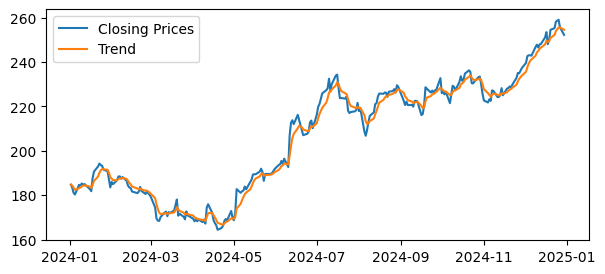

In [50]:
# This is my solution. It's not the only way to do it!
# Do NOT look at my solution before trying yours!!!
















import yfinance as yf

TICKER = 'AAPL'  # Let's get Apple stock prices to start!

# Lets get daily prices for 2024!
df = yf.download(
    tickers = TICKER,
    start='2024-01-01',
    end='2024-12-31',
    interval='1d',
    multi_level_index=False,
)

closing_prices = df['Close']
trendline = []
alpha = 0.7

my_money = 1000
my_stocks = 0
assets = 'cash' # I will change this for 'stocks' when I buy stocks


trendline.append( closing_prices.iloc[0] )
for i in range(1, len(closing_prices)):
    # Make a trendline
    newtrend = alpha * trendline[i-1] + (1-alpha) * closing_prices.iloc[i]
    trendline.append(newtrend)

    # This is the trading strategy
    if (assets=='cash') and (closing_prices.iloc[i] < trendline[i]):
        # Buy stocks
        my_stocks = my_money / closing_prices.iloc[i]
        my_money = 0
        assets = 'stocks'
    elif (assets=='stocks') and (closing_prices.iloc[i] > trendline[i]):
        # Sell stocks
        my_money = my_stocks * closing_prices.iloc[i]
        my_stocks = 0
        assets = 'cash'

my_worth = my_money + my_stocks * closing_prices.iloc[-1]
print("I ended up with $", my_worth) # Ok, according to my calculations, my strategy is not very good...  

plt.figure( figsize=(7,3) )
plt.plot(closing_prices, label='Closing Prices')
plt.plot(closing_prices.index, trendline, label='Trend')
plt.legend()
plt.show()


## Review and Exercises

At this point, you should be comfortable with using:

* Dataframes
* Indexing
* `for`, `if`, `elif`, `else`
* Making line plots with `matplotlib`
* Using the indexed structures `list` and `numpy.array`

Now, complete the code challenges below. Remember that:

* You probably have figured out that there are many built-in functions that do exactly the same as our `for` loops, possibly even faster. Refrain from using those, because the main reason we are doing these is to practice using these control structures.
* Also, deactivate AI (co-pilot, chatgpt, and so on). You will probably use it in a real-world production scenario, but the reason we have the code snippets here is to practice, not to get to a unique solution.
* At this point, we do not care about being efficient. Try to make your code as legible as possible!

In [51]:
# Challenge 1:
# The array below contains samples from a Normal distribution. Write code to use these numbers to estimate the mean and standard deviation of the distribution.
# Use 'for' loops to iterate over the samples!
# Remember you will probably be close to the true values, but not exactly there. The more samples you use, the closer you will be to the true values.
N = 1000
mu = 0
sigma = 1
samples = np.random.normal(mu, sigma, N)

# Make your solution here (using 'for' loops):
# -----


# ----
# Ground truth answer:
print("est:", samples.mean())
print("sigma:", samples.std())

est: 0.04558347347309895
sigma: 1.011317276021584


In [52]:
# Challenge 2:
# The array below contains samples from a Binomial distribution. Count how many of these samples are odd and how many are even. 
# Hint: use a % 2 == 0 to check if a number is even.
N = 10000
n = 100
p = 0.5
samples = np.random.binomial(n, p, N)

# Make your solution here (using 'for' loops):



In [53]:
# Challenge 3:
# The array below contains samples from a Poisson distribution. Count how many of these samples are prime. Do NOT use ready-made functions, only 'for' loops.
N = 10000
L = 50
samples = np.random.poisson(L, N)

# Make your solution here (using 'for' loops):


In [54]:
# Challenge 4:
# The Collatz Conjecture works like this: you will make a series o numbers following the rules below:
# - Start with any positive integer n.
# - If n is even, the next number is n/2.
# - If n is odd, the next number is 3n + 1.
# - Repeat the process indefinitely.
# The conjecture states that no matter which number you start with, you will always reach 1 eventually.

# Write code to test the Collatz Conjecture for numbers between 1 and 1000. You should print the series of numbers generated by the rules above.
passed_collatz = True
for n in range(1, 1000):
    # Make your solution here:
    # If it does not obbey the Collatz Conjecture, print the number and break the loop.
    if not passed_collatz:
        print("The Collatz Conjecture does not hold for n =", n)
        break

In [55]:
# Challenge 5
# The code below tries to generate a list of the prime numbers lesser than 100. However, there are bugs in the code. Can you find them and fix them?
primes = []

is_prime = True
for n in range(2, 100):
    if is_prime:
        primes.append(n)
    for i in range(2, n):
        if n % i == 0:
            is_prime = False
            break


print(primes)

[2, 3, 4]


In [56]:
# Challenge 6
# A common criterion to decide whether an asset is valuable is the Sharpe Ratio.
# The Sharpe Ratio is defined as the ratio of the mean of the asset's returns to the standard deviation of the asset's returns.
# A return is defined as the difference between the closing price of a stock on a given day and the closing price of the stock on the previous day, divided by the closing price of the stock on the previous day.
# Calculate the sharpee ratio for the stock prices of 2024 for the stock 'AAPL'. Do NOT use ready-made functions, only 'for' loops.
# Remember that the Sharpe Ratio is calculated using the daily *returns*, not the daily prices.

# Make your solution here:


